# Analyse Experiment

With pressure sensor parascientific and new speaer 

In [1]:
import os 
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
config = {}

In [3]:
config['datapath_femto'] = "/home/andbro/Documents/ROMY/Scripps_Fiber/data/femto/"

config['datapath_mseed'] = "/home/andbro/Documents/ROMY/Scripps_Fiber/data/mseed/"

config['experiment'] = 9
config['f_expected'] = {0:1.04, 1:0.1206, 2:0.1206, 3:0.1206, 4:0.1206, 6:1.0006, 7:1.0006, 8:0.5006, 9:2.0006, 10:10.0006}

## Load Data

2 Trace(s) in Stream:
.munki..p1s | 2022-09-28T16:50:00.019720Z - 2022-09-28T18:30:00.019720Z | 20.0 Hz, 120001 samples
.BARO..XXX  | 2022-09-28T16:50:00.069720Z - 2022-09-28T18:30:00.069720Z | 1.0 Hz, 6001 samples


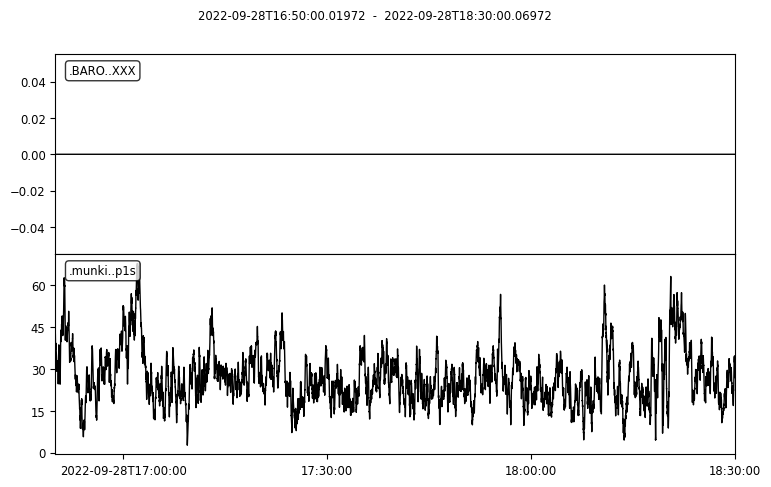

In [4]:
## load mseed
ex = obs.read(config['datapath_mseed']+f"experiment{config['experiment']}.mseed")

## show all traces in data stream
print(ex)
ex.plot(equal_scale=False);

## Zoom IN

Text(0, 0.5, 'Pressure (kPa)')

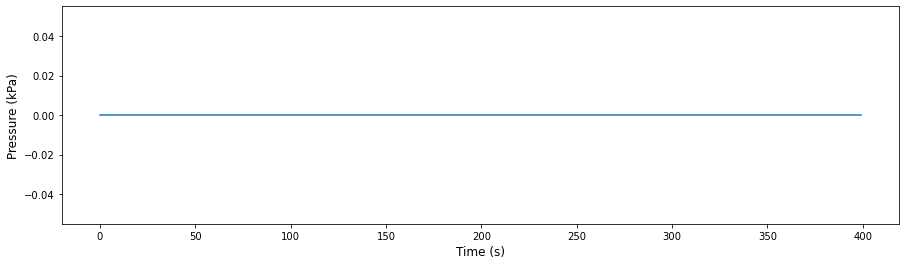

In [5]:
plt.figure(figsize=(15,4))
plt.plot(ex.select(station="BARO")[0].data[:400])
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Pressure (kPa)", fontsize=12)

In [15]:
def __plot_psd(trace, config):

    from scipy.signal import welch, hann


    signal = trace.data

    signal = [el if not np.isnan(el) else 0 for el in signal ]
    
    tstart = trace.stats.starttime
    
    nblock =  5122
    overlap = int(nblock /2)
    # window = hann(int(nblock))

    f, Pxx = welch(signal, fs=trace.stats.sampling_rate, 
                    window='hann', noverlap=overlap, nperseg=nblock,
                    scaling="density",
                    return_onesided=True)
    ## normalize
    # Pxx /= nblock

    Pxx /= max(Pxx)
    Pxx = 10*np.log10(Pxx)


    ## ------------------------

    font = 12

    fig, ax = plt.subplots(1,2,figsize=(15,5))

    tx = np.linspace(0, trace.stats.npts/trace.stats.sampling_rate/3600, trace.stats.npts)
    ax[0].plot(tx, signal)

    ax[1].vlines(config['f_expected'][config['experiment']], min(Pxx), max(Pxx), color="grey", ls="-", alpha=0.8, zorder=0)
    ax[1].plot(f, Pxx)

    
    ax[1].set_xscale("log")
    ax[1].set_ylim(-90,0)
    ax[1].set_xlim(1e-2,10)

    ax[0].set_xlabel(f"Time from {tstart.date} {str(tstart.time)[:8]} UTC (hours)", fontsize=font)
    ax[1].set_xlabel("Frequency (Hz)", fontsize=font)
    
    
    if trace.stats.station == "BARO":
        ax[0].set_ylabel("Pressure (kPa)", fontsize=font)
        ax[1].set_ylabel(r"PSD (dB rel. to 1 kPa$^2$/Hz )", fontsize=font)

    elif trace.stats.station == "munki":
        ax[0].set_ylabel("Phase (rad)", fontsize=font)
        ax[1].set_ylabel("PSD (dB rel. to 1 rad²/Hz )", fontsize=font)

    plt.show();

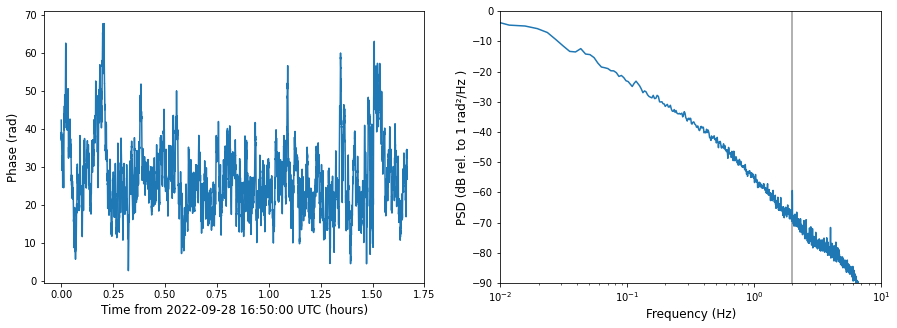

/home/andbro/anaconda3/envs/obs/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/home/andbro/anaconda3/envs/obs/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


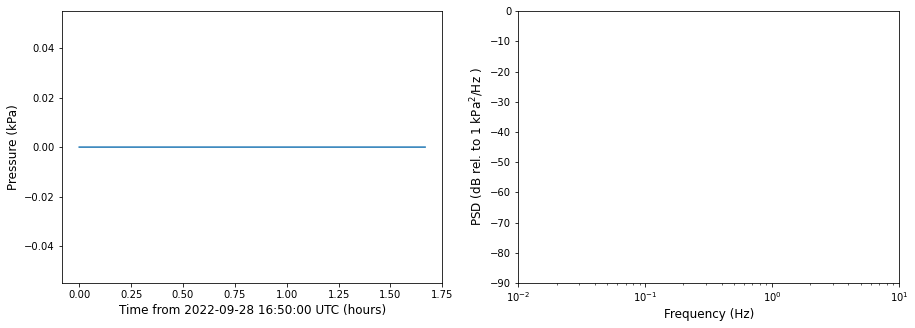

In [16]:
__plot_psd(ex.select(station="munki")[0], config)
__plot_psd(ex.select(station="BARO")[0], config)

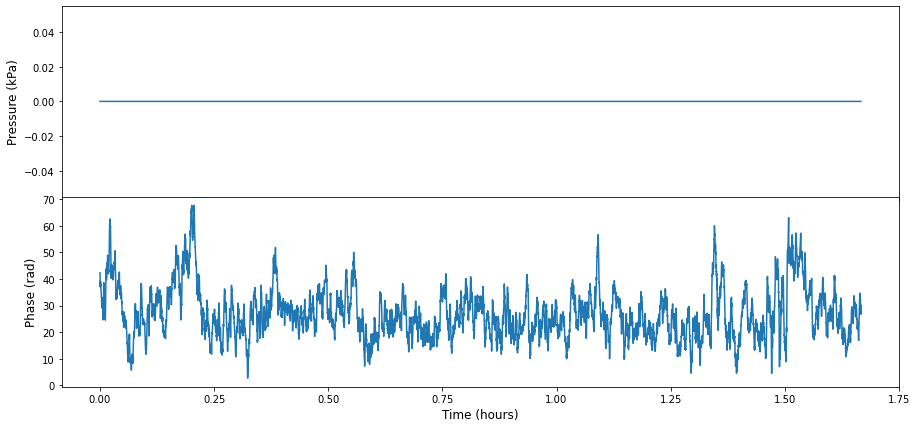

In [17]:
def __make_plot_traces(st):

    fig, ax = plt.subplots(2,1, figsize=(15,7), sharex=True)

    fig.subplots_adjust(hspace=0)

    ax[0].plot(st.select(station="BARO")[0].times()/3600, st.select(station="BARO")[0].data)
    ax[1].plot(st.select(station="munki")[0].times()/3600, st.select(station="munki")[0].data)

    plt.xlabel("Time (hours)", fontsize=12)
    ax[0].set_ylabel("Pressure (kPa)", fontsize=12)
    ax[1].set_ylabel("Phase (rad)", fontsize=12)

__make_plot_traces(ex)

In [14]:
from andbro__get_mean_amplitude import __get_mean_amplitude

signal = ex.select(station="BARO")[0]

amps, amps_mean, amps_std = __get_mean_amplitude(signal, deltaN=100)

amps_mean, amps_std

(0.0, 0.0)

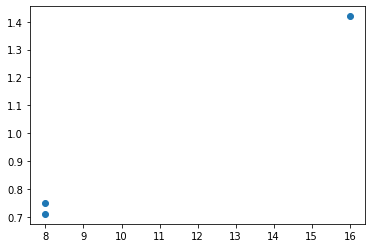

In [10]:
volts = [16, 8, 8]
press = [1.42, 0.75, 0.71]


plt.scatter(volts, press)